# AI허브 건강관리를 위한 음식 이미지

In [1]:
import os
import shutil
import random
random.seed = 42
root_dir = '../../'
base_dir = os.path.join(root_dir, 'healthy_food')
split_dir = {split_name:os.path.join(base_dir,split_name)
                for split_name in ['train','valid','test']}

## Train/Test Split

In [2]:
image_dir = os.path.join(base_dir, 'images')
base_dir = os.path.join(base_dir, 'data')
split_dir = {split_name:os.path.join(base_dir,split_name)
                for split_name in ['train','valid','test']}

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

for each_dir in split_dir.values():
    os.mkdir(each_dir)

In [3]:
for food_name in os.listdir(image_dir):
    if food_name.startswith('.'):
        continue

    food_dir = os.path.join(image_dir, food_name)
    split_food = {split_name:os.path.join(each_dir,food_name)
                    for split_name,each_dir in split_dir.items()}

    for each_food in split_food.values():
        os.mkdir(each_food)

    food_img_list = os.listdir(food_dir)
    for index, food_img in enumerate(food_img_list):
        if food_img.startswith('.'):
            continue

        src = os.path.join(food_dir, food_img)
        if index <= len(food_img_list)*0.8:
            dst = os.path.join(split_food['train'], food_img)
        elif index <= len(food_img_list)*0.9:
            dst = os.path.join(split_food['valid'], food_img)
        else:
            dst = os.path.join(split_food['test'], food_img)
        shutil.copyfile(src, dst)

## Resizing Data

In [2]:
resized_dir = os.path.join(root_dir, 'healthy_food_resized')
original_split_dir = {split_name:os.path.join(base_dir,split_name)
                        for split_name in ['train','valid','test']}
resized_split_dir = {split_name:os.path.join(resized_dir,split_name)
                        for split_name in ['train','valid','test']}

if os.path.exists(resized_dir):
    shutil.rmtree(resized_dir)
os.mkdir(resized_dir)

for each_dir in resized_split_dir.values():
    os.mkdir(each_dir)

In [3]:
dir_limit = {'train':100,'valid':10,'test':10}

for split_name in ['train','valid','test']:
    for food_name in os.listdir(original_split_dir[split_name]):
        if food_name.startswith('.'):
            continue

        original_food_dir = os.path.join(original_split_dir[split_name], food_name)
        resized_food_dir = os.path.join(resized_split_dir[split_name], food_name)
        os.mkdir(resized_food_dir)

        for index, food_image in enumerate(os.listdir(original_food_dir)):
            continue_count = 0
            if food_name.startswith('.'):
                continue_count += 1
                continue

            if index < (dir_limit[split_name]+continue_count):
                src = os.path.join(original_food_dir, food_image)
                dst = os.path.join(resized_food_dir, food_image)
                shutil.copyfile(src, dst)
            else:
                break

## Remove Truncated Images

In [ ]:
from PIL import Image, ImageFile

bad_file_list = list()
for image_dir in split_dir.values():
    for food_name in os.listdir(image_dir):
        if food_name.startswith('.'):
            continue

        food_dir = os.path.join(image_dir, food_name)
        for food_image in os.listdir(food_dir):
            if food_name.startswith('.'):
                continue

            food_file = os.path.join(food_dir, food_image)
            try:
                img = Image.open(food_file)
                img = img.convert('RGB')
            except OSError:
                bad_file_list.append(food_file)
                os.remove(food_file)

In [ ]:
len(bad_file_list)

65

## EDA

In [ ]:
import random
from matplotlib import pyplot as plt

# 클래스의 이미지 랜덤하게 1개 보여주는 함수
def show_random_image_in_train_set(food_name):
    image_dir = os.path.join(split_dir['train'], food_name)
    img = random.choice(os.listdir(image_dir))
    plt.imshow(plt.imread(os.path.join(image_dir, img)))

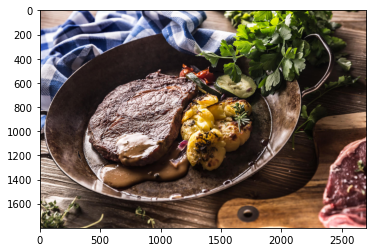

In [ ]:
show_random_image_in_train_set('스테이크')